Brownian motion has simulated. Shape: (100, 1), alpha = 0.2, sigma = 0.5, S0 = 100, t0 = 0, T = 1, n = 100


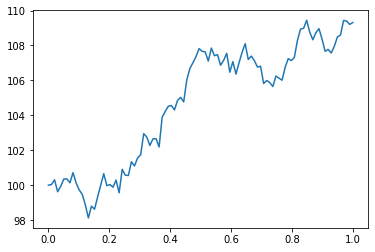

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simple_GBM(sigma, alpha, S0, t0, T, n):
    """
    Create simple geometric Brownnian motion with constant trend and volatility:
    
    dS = alpha*S_t*dt + sigma*S_t*dW
    
    sigma is in [0.2, 1]
    alpha is in [-1, 1] 
    
    """
    if not 0.2 <= sigma <= 1 or not -1 <= alpha <= 1:
        raise Exception('Parameters are out of range')
    # если n - количество точек на выходе, включая первую, то отрезков будет 
    # n - 1 
    dt = (T - t0)/(n-1)
    S = np.zeros((n,1)) # vector R:nx1
    t = np.zeros((n,1)) # vector R:nx1
    S_t = S[0] = S0
    t_t = t[0] = t0
    for i in range(1,n):
        dS = alpha*S_t*dt + sigma*S_t*np.random.normal(0, dt, 1)
        S[i] = S_t = S_t + dS
        t[i] = t_t = t_t + dt
    print(f'Brownian motion has simulated. Shape: {S.shape}, alpha = {alpha}, sigma = {sigma}, S0 = {S0}, t0 = {t0}, T = {T}, n = {n}')
    return t,S

stock_parameters = {'t0': 0,
                    'T': 1,
                    'n': 100,
                    'alpha': 0.2,
                    'sigma': 0.5,
                    'S0': 100}

plt.plot( *simple_GBM(**stock_parameters) )
plt.show()

In [7]:
def mean_reverse(sigma, theta, kappa, S0, t0, T, n):
    
    """
    Create simple mean-reverse Brownnian motion with constant trend and volatility:
    
    dS = alpha*S_t*dt + sigma*S_t*dW
    
    kappa is in (0, 50] (the higher kappa is, the faster process will reach theta)
    theta is in [0.5, 1.5]
    sigma is in [0.2, 1]
    alpha is in [-1, 1] 
    
    """
    if not 0.2 <= sigma <= 1 or not 0.5 <= theta <= 1.5 or not 0 < kappa <= 50:
        raise Exception('Parameters are out of range')
    # если n - количество точек на выходе, включая первую, то отрезков будет 
    # n - 1 
    theta = theta*S0
    dt = (T - t0)/(n-1)
    S = np.zeros((n,1)) # vector R:nx1
    t = np.zeros((n,1)) # vector R:nx1
    S_t = S[0] = S0
    t_t = t[0] = t0
    for i in range(1,n):
        dS = kappa*(theta - S_t)*dt + sigma*S_t*np.random.normal(0, dt, 1)
        S[i] = S_t = S_t + dS
        t[i] = t_t = t_t + dt
    print(f'Brownian motion has simulated. Shape: {S.shape}, kappa = {kappa}, theta = {theta}, sigma = {sigma}, S0 = {S0}, t0 = {t0}, T = {T}, n = {n}')
    return t,S

# stock_parameters = {'t0': 0,
#                     'T': 1,
#                     'n': 100,
#                     'sigma': 1,
#                     'theta': 1,
#                     'kappa':1,
#                     'S0': 100}
#
# plt.plot( *mean_reverse(**stock_parameters) )
# plt.show()

In [68]:
## f(St)
class ft:
    """
    contains option for function f(St) such as: 
    
    'constant_elasticity' => constant_elasticity_of_varience
    
    'lypton'  => lypton_hyperbolic_volatility
    
    'simple' => simple_varience
    
    """
    def __init__(self, option, alpha, beta, gamma):  
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma 
        self.option = option
        self.all_options = ['lypton', 'constant_elasticity',
                            'simple']
        
        # chose one of an option: 
        if self.option not in self.all_options:
            raise Exception('Unknown option for f(St)')
        else:
            if self.option == 'lypton':
                self.evaluate = self.lypton_hyperbolic_volatility
            elif self.option == 'constant_elasticity':
                self.evaluate = self.constant_elasticity_of_varience
            elif self.option == 'simple':
                self.evaluate = self.simple
        
    def constant_elasticity_of_varience(self, St):
        # beta >= 0
        return St**self.beta

    def lypton_hyperbolic_volatility(self, St):
        return St*self.beta + St**2
    
    def simple(self, St):
        return St

In [66]:
## V(St)
class dVt:
    """
    contains option for volatility V such as: 
    
    'CIR' => Heston model
    
    'Levis'  => Levis model
    
    'SABR' => SABR model
    
    """
    def __init__(self, option, kappa, epsilon, theta, dt):  
        self.kappa = kappa
        self.epsilon = epsilon
        self.theta = theta
        self.dt = dt
        self.all_options = ['CIR', 'Levis', 'SABR']
        
        # chose one of an option: 
        if self.option not in self.all_options:
            raise Exception('Unknown option for f(St)')
        else:
            if self.option == 'CIR':
                self.evaluate = self.CIR
            elif self.option == 'Levis':
                self.evaluate = self.Levis
            elif self.option == 'SABR':
                self.evaluate = self.SABR
            elif self.option == 'simple':
                self.evaluate = self.simple

    def CIR(self, Vt):
        # beta >= 0
        dZt = np.random.normal(0, self.dt, 1)
        dVt = self.kappa * (self.theta - Vt)*self.dt + \
            self.epsilon*np.sqrt(Vt)*dZt
        return dVt

    def Levis(self, Vt):
        dZt = np.random.normal(0, self.dt, 1)
        dVt = self.kappa * (self.theta - Vt)*Vt*self.dt + \
            self.epsilon*Vt**(3/2)*dZt
        return dVt
    
    def SABR(self, St):
        dZt = np.random.normal(0, self.dt, 1)
        dVt = self.epsilon*Vt*dZt
        return dVt
    
    def simple(self, St):
        return 1

In [67]:
## dSt(St, Vt)
class dSt:
    """
    contains option for volatility V such as: 
    
    'CIR' => Heston model
    
    'Levis'  => Levis model
    
    'SABR' => SABR model
    
    """
    
    def __init__(self, option, dt, sigma, theta, kappa):  
        self.kappa = kappa
        self.epsilon = epsilon
        self.theta = theta
        self.dt = dt
        self.all_options = ['mean-reverse', 'linear']
        
        # chose one of an option: 
        if self.option not in self.all_options:
            raise Exception('Unknown option for f(St)')
        else:
            if self.option == 'mean-reverse':
                self.evaluate = self.mean_reverse
            elif self.option == 'linear':
                self.evaluate = self.linear

    def mean_reverse(self, St, Vt, ft):
        dWt = np.random.normal(0, self.dt, 1)
        dSt = self.kappa*(self.theta - St)*dt \
            + np.sqrt(Vt)*ft*dWt
        return dSt
        
    def linear(self, St, Vt, ft):
        dWt = np.random.normal(0, self.dt, 1)
        dSt = (self.a*St + self.b)*dt \
            + np.sqrt(Vt)*ft*dWt
        return dSt

In [63]:
class test_class:
    def __init__(self, opt):
        self.opt = opt
        self.evaluate = self.stuff
        
    def stuff(self):
        if self.opt == 1:
            print(1)
        else:
            print(2)
    def test1(self,v):
        return v + 1

In [ ]:
def simulate_process(S0, t0, T, n, ):
    
    """
    Create simple mean-reverse Brownnian motion with constant trend and volatility:
    
    dS = alpha*S_t*dt + sigma*S_t*dW
    
    kappa is in (0, 50] (the higher kappa is, the faster process will reach theta)
    theta is in [0.5, 1.5]
    sigma is in [0.2, 1]
    alpha is in [-1, 1] 
    
    """
    if not 0.2 <= sigma <= 1 or not 0.5 <= theta <= 1.5 or not 0 < kappa <= 50:
        raise Exception('Parameters are out of range')
    # если n - количество точек на выходе, включая первую, то отрезков будет 
    # n - 1 
    theta = theta*S0
    dt = (T - t0)/(n-1)
    S = np.zeros((n,1)) # vector R:nx1
    t = np.zeros((n,1)) # vector R:nx1
    S_t = S[0] = S0
    t_t = t[0] = t0
    for i in range(1,n):
        dS = kappa*(theta - S_t)*dt + sigma*S_t*np.random.normal(0, dt, 1)
        S[i] = S_t = S_t + dS
        t[i] = t_t = t_t + dt
    print(f'Brownian motion has simulated. Shape: {S.shape}, kappa = {kappa}, theta = {theta}, sigma = {sigma}, S0 = {S0}, t0 = {t0}, T = {T}, n = {n}')
    return t,S
    
    